## Atividade Curta 2 - Definindo Keypoints em imagens

#### Aluno: 119891 - João Vitor Silva de Oliveira


### Importando Bibliotecas

In [97]:
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt

### Carregando a Imagem

Imagem utilizada:


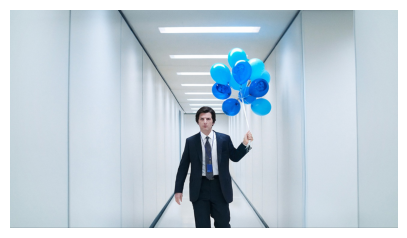

In [98]:
image = cv2.imread('severance.jpg')
print("Imagem utilizada:")
plt.figure(figsize=(5, 5))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")  
plt.show()

### Amostragem aleatória de 300 pontos

In [99]:
random_keypoints = []
for _ in range(300):
    x = random.randint(0, image.shape[1] - 1)
    y = random.randint(0, image.shape[0] - 1)
    keypoint = cv2.KeyPoint(x, y, size=20)  # tamanho fixo para todos os keypoints
    random_keypoints.append(keypoint)

### Amostragem em Grid de tamanho 15 x 15

In [100]:
grid_keypoints = []
grid_size = 15
for y in range(0, image.shape[0], grid_size):
    for x in range(0, image.shape[1], grid_size):
        keypoint = cv2.KeyPoint(x, y, size=20)
        grid_keypoints.append(keypoint)


### Amostragem utilizando FAST

In [101]:
fast = cv2.FastFeatureDetector_create()
fast_keypoints = fast.detect(image, None)

### Descritor

In [102]:
orb = cv2.ORB_create()
# keypoints = random_keypoints + grid_keypoints + fast_keypoints
keypoints, random_descriptors = orb.compute(image, random_keypoints)
keypoints, grid_descriptors = orb.compute(image, grid_keypoints)
keypoints, fast_descriptors = orb.compute(image, fast_keypoints)

print("Random Keypoints")
print("Tamanho do código para o primeiro keypoint:", len(random_descriptors[0]))
print("Código gerado para o primeiro keypoint:", random_descriptors[0])

print()
print("Grid Keypoints")
print("Tamanho do código para o primeiro keypoint:", len(grid_descriptors[0]))
print("Código gerado para o primeiro keypoint:", grid_descriptors[0])

print()
print("FAST Keypoints")
print("Tamanho do código para o primeiro keypoint:", len(fast_descriptors[0]))
print("Código gerado para o primeiro keypoint:", fast_descriptors[0])

Random Keypoints
Tamanho do código para o primeiro keypoint: 32
Código gerado para o primeiro keypoint: [138  77 116 229 101  94 254 244 109 134 126   2 237  63  23 231 250 245
 255 226 228 176 113 238 183 250 198   3 103 253 109 198]

Grid Keypoints
Tamanho do código para o primeiro keypoint: 32
Código gerado para o primeiro keypoint: [ 17 140  79  18 136 129  76 211 150 114 180 216  17 134 160  32   9 162
 118 156 123  79  42  54  56 139 181 248  97 192 200 104]

FAST Keypoints
Tamanho do código para o primeiro keypoint: 32
Código gerado para o primeiro keypoint: [250  32 102  24  79 241 208  71 195  85 164 191  11 140 118 159 104 160
 233 149  14 111 182 145  18  65 208 123 119 140 126  94]


### Desenhando Keypoints

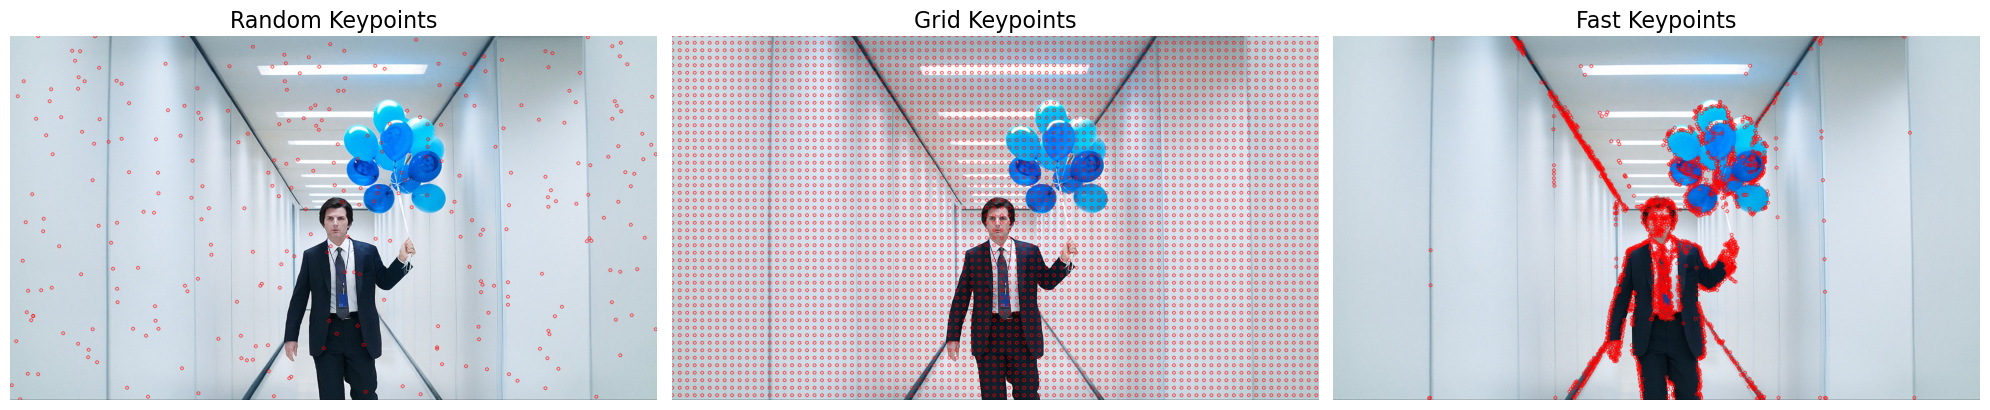

In [103]:
image_random_keypoints = cv2.drawKeypoints(image, random_keypoints, None, color=(0,0,255))
image_grid_keypoints = cv2.drawKeypoints(image, grid_keypoints, None, color=(0,0,255))
image_fast_keypoints = cv2.drawKeypoints(image, fast_keypoints, None, color=(0,0,255))

fig, axes = plt.subplots(1, 3, figsize=(20,10))

axes[0].set_title("Random Keypoints", fontsize=16)
axes[0].imshow(cv2.cvtColor(image_random_keypoints, cv2.COLOR_BGR2RGB))
axes[0].axis("off")  

axes[1].set_title("Grid Keypoints", fontsize=16)
axes[1].imshow(cv2.cvtColor(image_grid_keypoints, cv2.COLOR_BGR2RGB))
axes[1].axis("off")  

axes[2].set_title("Fast Keypoints", fontsize=16)
axes[2].imshow(cv2.cvtColor(image_fast_keypoints, cv2.COLOR_BGR2RGB))
axes[2].axis("off")  
plt.tight_layout()
plt.show()

#### Imagens ampliadas

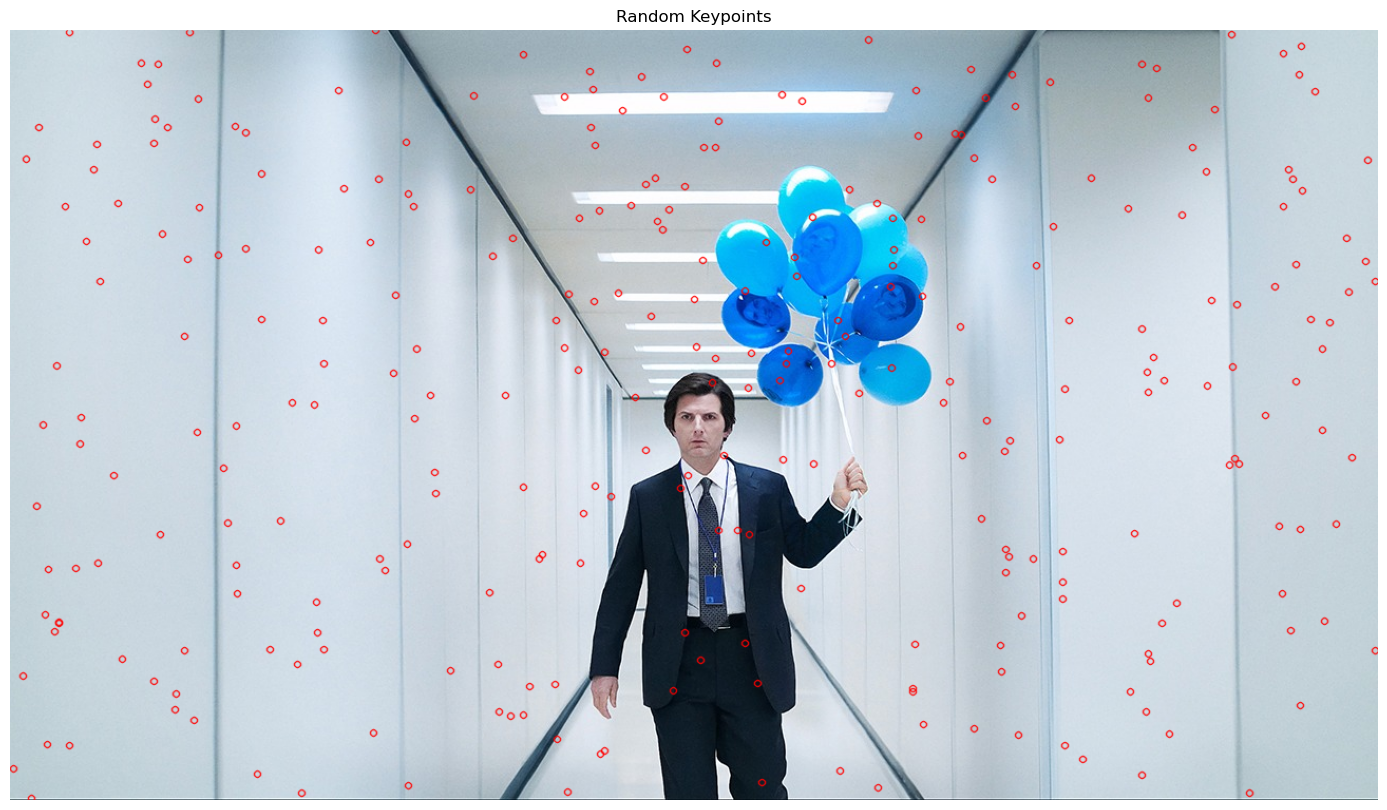

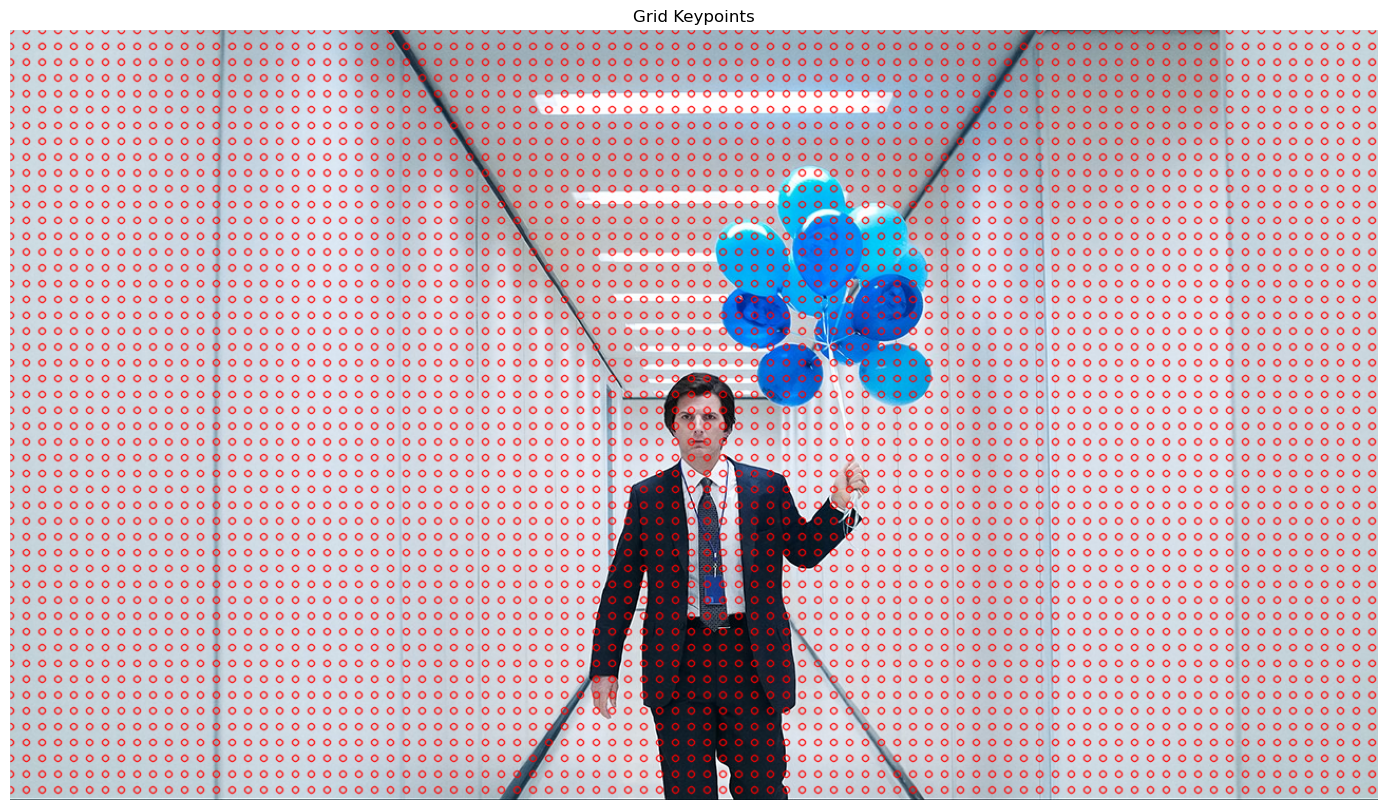

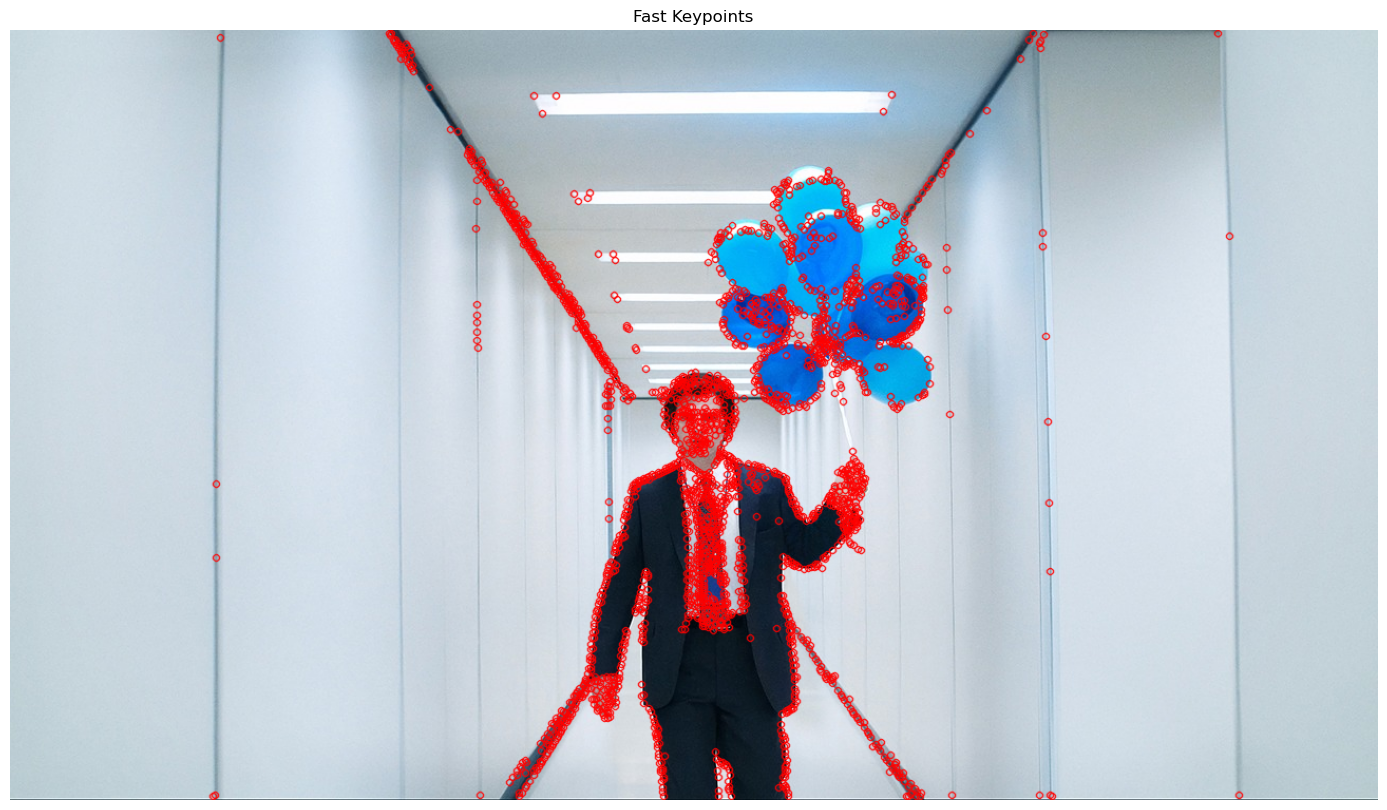

In [104]:
plt.figure(figsize=(20, 10))
plt.imshow(cv2.cvtColor(image_random_keypoints, cv2.COLOR_BGR2RGB))
plt.axis("off")  
plt.title("Random Keypoints")
plt.show()

plt.figure(figsize=(20, 10))
plt.imshow(cv2.cvtColor(image_grid_keypoints, cv2.COLOR_BGR2RGB))
plt.axis("off")  
plt.title("Grid Keypoints")
plt.show()

plt.figure(figsize=(20, 10))
plt.imshow(cv2.cvtColor(image_fast_keypoints, cv2.COLOR_BGR2RGB))
plt.title("Fast Keypoints")
plt.axis("off")  
plt.show()